In [1]:
from pysus.online_data import parquets_to_dataframe
from pysus.online_data import SINAN
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np
import matplotlib.colors as colors

## SINAN doenças existentes e anos disponiveis

In [2]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

In [3]:
SINAN.get_available_years('Animais Peçonhentos')

['2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

## Descobre qual região do Brasil tem mais registros de picadas por animais peçonhentos.


In [4]:
ap07, ap08, ap09, ap10, ap11 = SINAN.download('Animais Peçonhentos', [2007, 2008, 2009, 2010, 2011])

In [5]:
df1 = parquets_to_dataframe(ap07)

In [6]:
df2 = parquets_to_dataframe(ap08)

In [7]:
df3 = parquets_to_dataframe(ap09)

In [8]:
df4 = parquets_to_dataframe(ap10)

In [9]:
df5 = parquets_to_dataframe(ap11)

In [10]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

In [11]:
df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2,X29,2007-03-15,200711,2007,43,430995,1611,2007-03-15,200711,...,2,,,,,2,1,,20070316,20070410
1,2,X29,2007-03-01,200709,2007,43,430995,1611,2007-02-25,200709,...,2,,,,,2,1,,20070302,20070327
2,2,X29,2007-03-16,200711,2007,52,521830,1784,2007-03-16,200711,...,,,,,,,1,,20070317,20070706
3,2,X29,2007-03-21,200712,2007,42,421710,1555,2007-03-21,200712,...,2,,,,,1,1,,20070504,20070327
4,2,X29,2007-03-14,200711,2007,26,260920,1498,2007-03-14,200711,...,,,,,,,,,,20070409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137933,2,X29,2011-05-21,201120,2011,31,317010,1461,2011-05-21,201120,...,2,,,,,2,1,,20110525,
137934,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,9,1,,20110803,20110408
137935,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,9,1,,20110803,20110408
137936,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,2,1,,20110806,20110808


In [12]:
df = df.rename_axis('index_').reset_index()
df

,index_,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,0,2,X29,2007-03-15,200711,2007,43,430995,1611,2007-03-15,...,2,,,,,2,1,,20070316,20070410
1,1,2,X29,2007-03-01,200709,2007,43,430995,1611,2007-02-25,...,2,,,,,2,1,,20070302,20070327
2,2,2,X29,2007-03-16,200711,2007,52,521830,1784,2007-03-16,...,,,,,,,1,,20070317,20070706
3,3,2,X29,2007-03-21,200712,2007,42,421710,1555,2007-03-21,...,2,,,,,1,1,,20070504,20070327
4,4,2,X29,2007-03-14,200711,2007,26,260920,1498,2007-03-14,...,,,,,,,,,,20070409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596361,137933,2,X29,2011-05-21,201120,2011,31,317010,1461,2011-05-21,...,2,,,,,2,1,,20110525,
596362,137934,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,9,1,,20110803,20110408
596363,137935,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,9,1,,20110803,20110408
596364,137936,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,2,1,,20110806,20110808


In [13]:
df = df.replace('', 'unknown')

In [14]:
df_clone=df[:]
df_final=df_clone[['SG_UF_NOT','index_']]
df_final

,SG_UF_NOT,index_
0,43,0
1,43,1
2,52,2
3,42,3
4,26,4
...,...,...
596361,31,137933
596362,24,137934
596363,24,137935
596364,24,137936


In [15]:
mapeamento_uf_regiao = {
    '11': 'Norte',
    '12': 'Norte',
    '13': 'Norte',
    '14': 'Norte',
    '15': 'Norte',
    '16': 'Norte',
    '17': 'Norte',
    '21': 'Nordeste',
    '22': 'Nordeste',
    '23': 'Nordeste',
    '24': 'Nordeste',
    '25': 'Nordeste',
    '26': 'Nordeste',
    '27': 'Nordeste',
    '28': 'Nordeste',
    '29': 'Nordeste',
    '31': 'Sudeste',
    '32': 'Sudeste',
    '33': 'Sudeste',
    '35': 'Sudeste',
    '41': 'Sul',
    '42': 'Sul',
    '43': 'Sul',
    '50': 'Centro-Oeste',
    '51': 'Centro-Oeste',
    '52': 'Centro-Oeste',
    '53': 'Centro-Oeste',
    'unknown': ' '
}

# Mapear os estados para regiões
df['Regiao'] = df['SG_UF_NOT'].map(mapeamento_uf_regiao)

registros_por_regiao = df['Regiao'].value_counts()
registros_por_regiao

Sudeste         188613
Nordeste        179061
Sul             133660
Norte            64983
Centro-Oeste     30048
                     1
Name: Regiao, dtype: int64

## Plotando o grafico barra de Contagem de Registros por Região


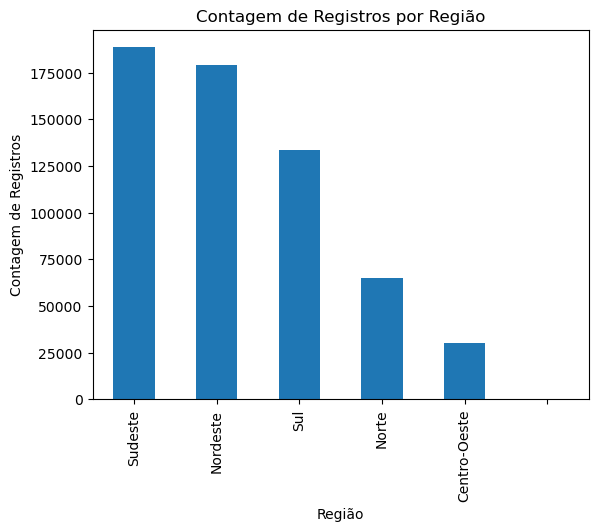

In [16]:
# Calcular a contagem de registros por região
registros_por_regiao = df['Regiao'].value_counts()

# Plotar o gráfico de barras
registros_por_regiao.plot.bar()

# Configurar o título e os rótulos dos eixos
plt.title('Contagem de Registros por Região')
plt.xlabel('Região')
plt.ylabel('Contagem de Registros')

# plt.barh(y=df['Regiao'], width=registros_por_regiao, color='red')


# Mostrar o gráfico
plt.show()


## Plotando Grafico time-series de evolução temporal dos Registros de Picadas por Animais Peçonhentos por Ano

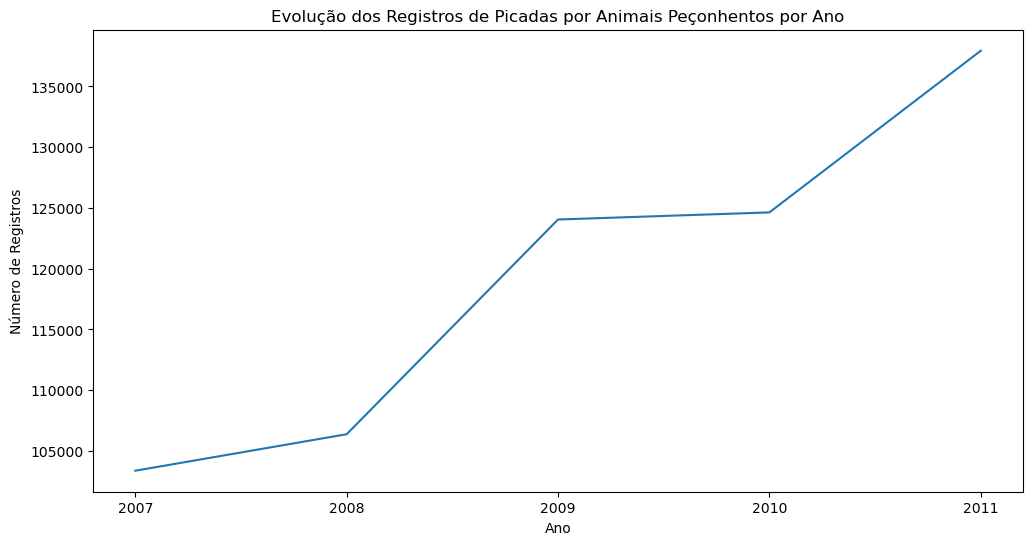

In [17]:
# Certifique-se de que a coluna 'DT_NOTIFIC' esteja em formato de data adequado
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

# Extrair o ano inteiro da coluna 'DT_NOTIFIC'
df['Ano'] = df['DT_NOTIFIC'].dt.year

# Converter os valores da coluna 'Ano' em números inteiros
df['Ano'] = df['Ano'].astype(int)

# Calcular o número de ocorrências por ano
registros_por_ano = df['Ano'].value_counts().sort_index()

# Plotar o gráfico de visualização temporal
fig, ax = plt.subplots(figsize=(12, 6))
registros_por_ano.plot(kind='line', ax=ax)

ax.set_title('Evolução dos Registros de Picadas por Animais Peçonhentos por Ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Registros')

# Definir os locais dos ticks do eixo x
plt.xticks(registros_por_ano.index)

plt.show()